# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('aug_data')

Found 4800 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [116]:
batch = data_iterator.next()

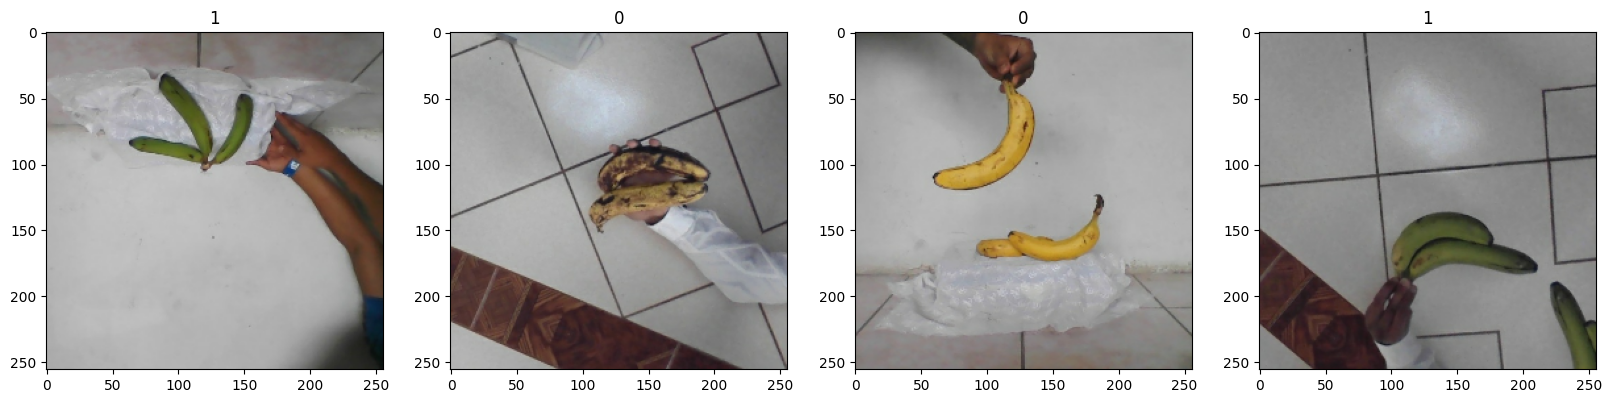

In [117]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) 
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.57990193, 0.57990193, 0.57990193],
          [0.57916665, 0.57916665, 0.57916665],
          [0.57614887, 0.57614887, 0.57614887],
          ...,
          [0.34813112, 0.24258578, 0.23507966],
          [0.35067403, 0.23596814, 0.20949756],
          [0.48163298, 0.35736826, 0.30540746]],
 
         [[0.58754593, 0.58754593, 0.58754593],
          [0.58739275, 0.58739275, 0.58739275],
          [0.5808824 , 0.5808824 , 0.5808824 ],
          ...,
          [0.31318933, 0.23451287, 0.23181678],
          [0.31366423, 0.22420344, 0.20127144],
          [0.37867647, 0.2934283 , 0.2444087 ]],
 
         [[0.58007044, 0.58007044, 0.58007044],
          [0.57991725, 0.57991725, 0.57991725],
          [0.5790594 , 0.5790594 , 0.5790594 ],
          ...,
          [0.27118567, 0.2173407 , 0.21894914],
          [0.26515013, 0.21537991, 0.2       ],
          [0.24099265, 0.19295344, 0.16116728]],
 
         ...,
 
         [[0.62107843, 0.62107843, 0.6132353 ],
          [0.61910

In [124]:
data.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

# 5. Split Data

In [129]:
batch[0].shape

(32, 256, 256, 3)

In [130]:
batch[0].shape[0]

32

In [134]:
images = 4800
print(int(images/ batch[0].shape[0]))

150


In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [119]:
print('Train_size:',train_size, ', Val_size:',val_size,', Test_size:',test_size )

Train_size: 105 , Val_size: 30 , Test_size: 15


In [135]:
if (train_size+test_size+val_size)==int(images/ batch[0].shape[0]):
    print(True)

True


In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [136]:
val.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

# 7. Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
105/105 [==============================] - 14s 93ms/step - loss: 0.6157 - accuracy: 0.6917 - val_loss: 0.2528 - val_accuracy: 0.9167
Epoch 2/100
105/105 [==============================] - 10s 94ms/step - loss: 0.2008 - accuracy: 0.9277 - val_loss: 0.0852 - val_accuracy: 0.9677
Epoch 3/100
105/105 [==============================] - 10s 94ms/step - loss: 0.0646 - accuracy: 0.9762 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 4/100
105/105 [==============================] - 10s 94ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0331 - val_accuracy: 0.9885
Epoch 5/100
105/105 [==============================] - 10s 94ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.0141 - val_accuracy: 0.9937
Epoch 6/100
105/105 [==============================] - 10s 93ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0145 - val_accuracy: 0.9948
Epoch 7/100
105/105 [==============================] - 10s 94ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0130 - val_ac

Epoch 57/100
105/105 [==============================] - 10s 91ms/step - loss: 4.0393e-05 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9708
Epoch 58/100
105/105 [==============================] - 10s 92ms/step - loss: 3.5178e-05 - accuracy: 1.0000 - val_loss: 0.2045 - val_accuracy: 0.9688
Epoch 59/100
105/105 [==============================] - 10s 95ms/step - loss: 3.2579e-05 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 0.9719
Epoch 60/100
105/105 [==============================] - 10s 95ms/step - loss: 2.9903e-05 - accuracy: 1.0000 - val_loss: 0.2216 - val_accuracy: 0.9688
Epoch 61/100
105/105 [==============================] - 10s 92ms/step - loss: 2.1884e-05 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9740
Epoch 62/100
105/105 [==============================] - 10s 91ms/step - loss: 1.9138e-05 - accuracy: 1.0000 - val_loss: 0.1865 - val_accuracy: 0.9750
Epoch 63/100
105/105 [==============================] - 10s 91ms/step - loss: 1.6237e-05 - accuracy:

In [41]:
hist.history

{'loss': [0.6157082915306091,
  0.2008340209722519,
  0.06460896879434586,
  0.022373490035533905,
  0.011334859766066074,
  0.004206841345876455,
  0.0017721106996759772,
  0.0011205467162653804,
  0.3280124366283417,
  0.6932048797607422,
  0.6932324171066284,
  0.6834669709205627,
  0.5715476870536804,
  0.4487667679786682,
  0.2221442312002182,
  0.11572331935167313,
  0.06466380506753922,
  0.061990201473236084,
  0.029601842164993286,
  0.017921360209584236,
  0.014131897129118443,
  0.012881624512374401,
  0.009326986037194729,
  0.0073644076474010944,
  0.006707911845296621,
  0.00551966018974781,
  0.005907020065933466,
  0.004159356467425823,
  0.026327533647418022,
  0.006256289780139923,
  0.0036325333639979362,
  0.002879527397453785,
  0.0028028213419020176,
  0.0019673986826092005,
  0.0020068364683538675,
  0.001297161215916276,
  0.001398478401824832,
  0.0007456776220351458,
  0.32469844818115234,
  0.01632888801395893,
  0.004578304942697287,
  0.002307584974914789,


# 8. Plot Performance

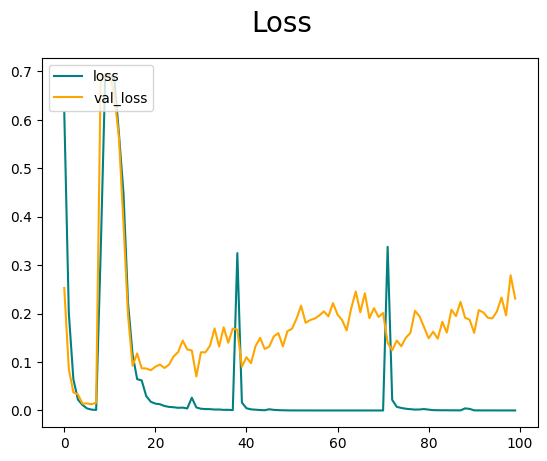

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

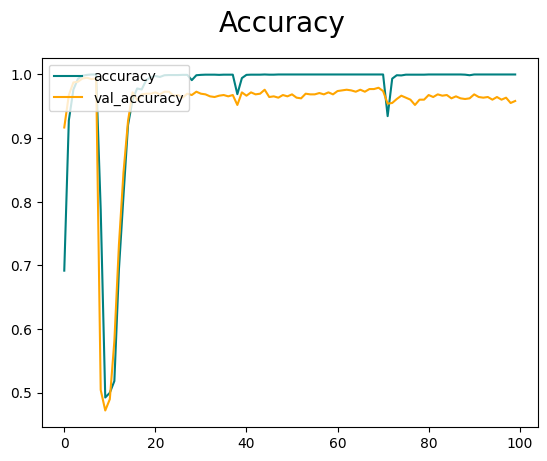

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.97119343, shape=(), dtype=float32) tf.Tensor(0.9554656, shape=(), dtype=float32) tf.Tensor(0.9625, shape=(), dtype=float32)


In [48]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{ acc.result().numpy()}')

Precision:0.9711934328079224, Recall:0.9554656147956848, Accuracy:0.9624999761581421


# 10. Test

In [49]:
import cv2

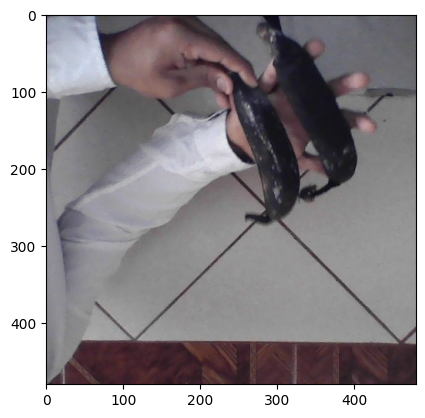

In [103]:
img = cv2.imread('0bd617f0-7a3b-11ed-b374-346f2492e578ma.4.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

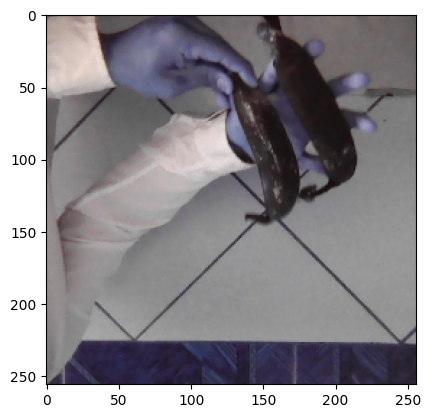

In [104]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [106]:
yhat

array([[1.]], dtype=float32)

In [107]:
yhat[0][0:2]

array([1.], dtype=float32)

In [108]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model.save(os.path.join('models','salio.h5'))

In [82]:
new_model = load_model('models/salio.h5')

In [83]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.00291851]], dtype=float32)